In [4]:
import sys
import pandas as pd
import matplotlib as plt
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates
from PIL import Image as im
from matplotlib import colors

from config import *
from SE_Interface import *

In [5]:
se_interface = SE_Interface()

summer = datetime(year=2021, month=8, day=15, hour=23)
now = datetime.now()
data = se_interface.request_SitePowerDetailed(now, timedelta(days=1))
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

Requesting: https://monitoringapi.solaredge.com/site/2130766/powerDetails?meters=Consumption,Production&startTime=2021-12-15 15:43:46&endTime=2021-12-16 15:43:46&api_key=NTT5LNJGA5CDCFI9OZGZCX2W1VD3CCW2


NameError: name 'se_interface' is not defined

In [ ]:
data

,Production,Consumption
Datetime,,
2021-12-15 15:30:00,56.666668,579.4733
2021-12-15 15:45:00,0.000000,618.4346
2021-12-15 16:00:00,0.000000,606.7789
2021-12-15 16:15:00,0.000000,557.1759
2021-12-15 16:30:00,0.000000,576.8830
...,...,...
2021-12-16 14:30:00,464.333340,4186.3190
2021-12-16 14:45:00,332.000000,5348.3164
2021-12-16 15:00:00,200.666670,2886.3840


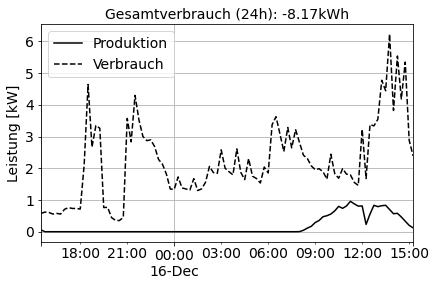

In [ ]:
#summer = datetime(year=2021, month=8, day=15, hour=23, minute=15)
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

df = data.copy()
df = df / 1000 # set to KWh
df = df.iloc[1: , :]    # Drop first row

# Plot lines
scaling = 120
fontsize = 14
width = EPD_WIDTH / scaling
height = EPD_HEIGHT / scaling
cmap = colors.ListedColormap(["black"])

df.plot(style=["-", "--"], figsize=(width, height), cmap=cmap, fontsize=fontsize)


# Add total consumption
total_production = df["Consumption"].sum()
total_consumption = df["Production"].sum()
total = (total_consumption - total_production) / (24)


# Formatting
plt.title(f"Gesamtverbrauch (24h): {total:.2f}kWh", fontsize=fontsize)
plt.grid()
plt.xlabel("")
plt.ylabel("Leistung [kW]", fontsize=fontsize)
plt.legend(labels=["Produktion", "Verbrauch"], fontsize=fontsize)


# Output
plt.savefig("../out/plot.png", dpi=500, facecolor="white")
plt.show()

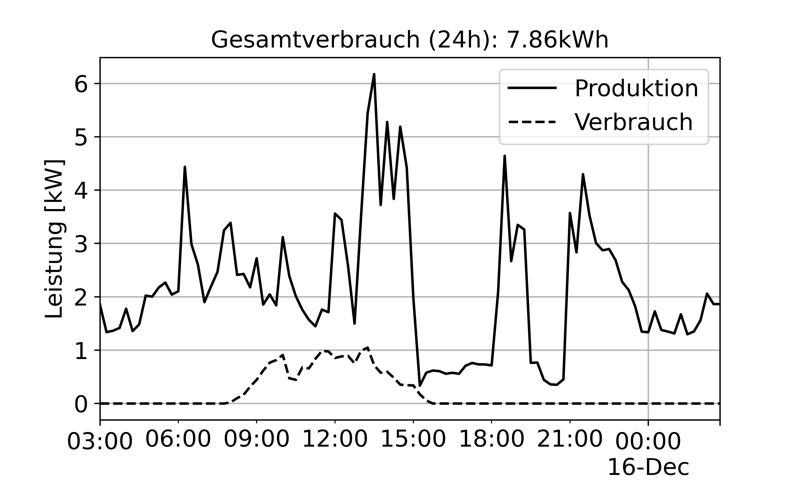

In [ ]:
# png to bmp
from PIL import Image

file_in = "../out/plot.png"
img = Image.open(file_in)#.convert("1")

thresh = 20
fn = lambda x : 255 if x > thresh else 0
r = img.convert('L').point(fn, mode='1')


img = img.resize((800,480))
file_out = "../out/plot.bmp"
img.save(file_out)
img


In [ ]:
# include parent folder (Notebook version)
import os, sys, inspect

notebook_dir = os.getcwd()
parentdir = os.path.dirname(notebook_dir)

sys.path.insert(0, parentdir)


from lib.epd7in5_V2 import *
from PIL import Image,ImageDraw,ImageFont

epd = EPD()

logging.info("init and Clear")
epd.init()
epd.Clear()

RuntimeError: Cannot find sysfs_software_spi.so

In [ ]:
from lib.epd7in5_V2 import *
from PIL import Image,ImageDraw,ImageFont

epd = EPD()

logging.info("init and Clear")
epd.init()
epd.Clear()

In [ ]:
Himage = Image.open("../out/plot.bmp")
epd.display(epd.getbuffer(Himage))